In [15]:
import pandas as pd

movies_df = pd.read_csv('movie_dataset.csv')

display(movies_df)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en

In [16]:
# Check null values
print(movies_df.isnull().sum())

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64


In [17]:
total_movies = len(movies_df)

popular_movies = len(movies_df[movies_df['popularity'] > 100])

percentage = (popular_movies / total_movies) * 100

print(f"{percentage:.2f}% movies have popularity over 100")


1.89% movies have popularity over 100


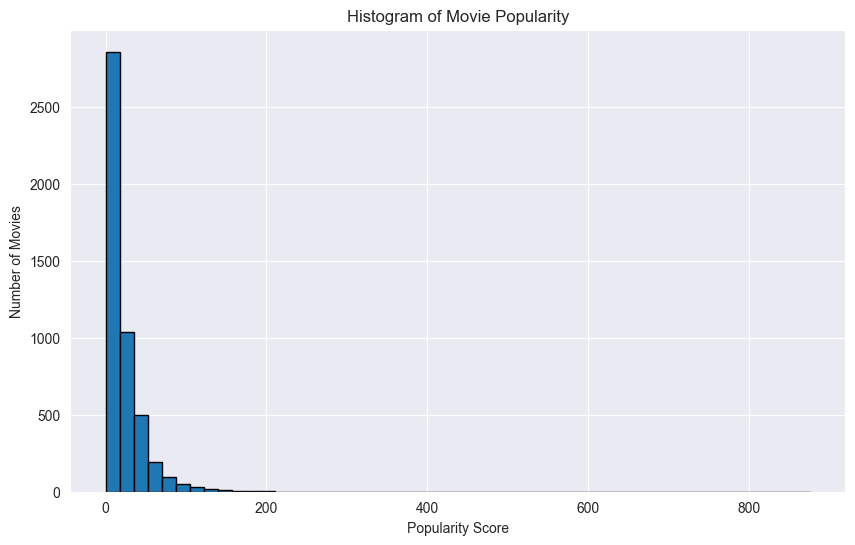

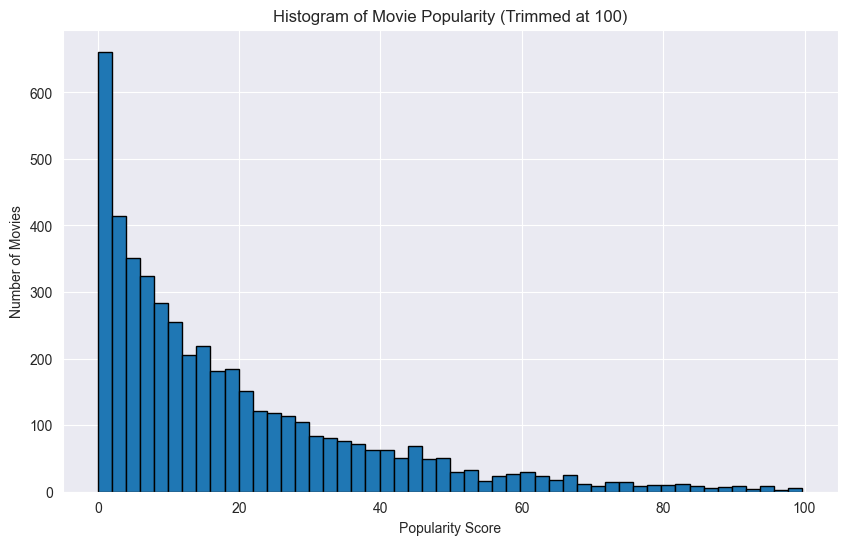

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(movies_df['popularity'], bins=50, edgecolor='black')
plt.title('Histogram of Movie Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.savefig('histogram_popularity_full.png')
plt.show()


plt.figure(figsize=(10, 6))
movies_df[movies_df['popularity'] < 100]['popularity'].hist(bins=50, edgecolor='black')
plt.title('Histogram of Movie Popularity (Trimmed at 100)')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Movies')
plt.savefig('histogram_popularity_trimmed.png')
plt.grid(True)
plt.show()



In [19]:
# Select features
features = [
    'budget', 'genres', 'release_date', 
    'runtime', 'original_language', 'popularity', 
    'vote_average', 'vote_count', 'revenue'
]

movies_df = movies_df[features]
display(movies_df)

,budget,genres,release_date,runtime,original_language,popularity,vote_average,vote_count,revenue
0,237000000,Action Adventure Fantasy Science Fiction,2009-12-10,162.0,en,150.437577,7.2,11800,2787965087
1,300000000,Adventure Fantasy Action,2007-05-19,169.0,en,139.082615,6.9,4500,961000000
2,245000000,Action Adventure Crime,2015-10-26,148.0,en,107.376788,6.3,4466,880674609
3,250000000,Action Crime Drama Thriller,2012-07-16,165.0,en,112.312950,7.6,9106,1084939099
4,260000000,Action Adventure Science Fiction,2012-03-07,132.0,en,43.926995,6.1,2124,284139100
...,...,...,...,...,...,...,...,...,...
4798,220000,Action Crime Thriller,1992-09-04,81.0,es,14.269792,6.6,238,2040920
4799,9000,Comedy Romance,2011-12-26,85.0,en,0.642552,5.9,5,0
4800,0,Comedy Drama Romance TV Movie,2013-10-13,120.0,en,1.444476,7.0,6,0
4801,0,NaN,2012-05-03,98.0,en,0.857008,5.7,7,0


In [20]:
print(movies_df.isnull().sum())

budget                0
genres               28
release_date          1
runtime               2
original_language     0
popularity            0
vote_average          0
vote_count            0
revenue               0
dtype: int64


In [21]:
# Delete duplicates
movies_df.drop_duplicates(inplace=True)

# puting unknown in the genras with null variable
movies_df['genres'] = movies_df['genres'].fillna('Unknown')
# Delete null values
movies_df = movies_df.dropna()

print(movies_df.isnull().sum())

budget               0
genres               0
release_date         0
runtime              0
original_language    0
popularity           0
vote_average         0
vote_count           0
revenue              0
dtype: int64


In [22]:
# Separate numeric and categorical values
numeric_features = ['budget', 'runtime', 'vote_average', 'vote_count', 'revenue']
categorical_features = ['genres', 'original_language']


In [23]:
# Data conversion to realease year
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# Add realease_year as a numeric feature
numeric_features.append('release_year')
movies_df.drop(columns=['release_date'], inplace=True)

movies_df['genres_score'] = movies_df.groupby('genres')['popularity'].transform('mean')

lang_popularity = movies_df.groupby('original_language')['popularity'].mean()
movies_df['language_score'] = movies_df['original_language'].map(lang_popularity)


In [24]:
display(movies_df)

,budget,genres,runtime,original_language,popularity,vote_average,vote_count,revenue,release_year,genres_score,language_score
0,237000000,Action Adventure Fantasy Science Fiction,162.0,en,150.437577,7.2,11800,2787965087,2009,74.735840,22.187274
1,300000000,Adventure Fantasy Action,169.0,en,139.082615,6.9,4500,961000000,2007,96.821677,22.187274
2,245000000,Action Adventure Crime,148.0,en,107.376788,6.3,4466,880674609,2015,65.729958,22.187274
3,250000000,Action Crime Drama Thriller,165.0,en,112.312950,7.6,9106,1084939099,2012,22.296815,22.187274
4,260000000,Action Adventure Science Fiction,132.0,en,43.926995,6.1,2124,284139100,2012,49.646786,22.187274
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,Action Crime Thriller,81.0,es,14.269792,6.6,238,2040920,1992,24.161877,13.330804
4799,9000,Comedy Romance,85.0,en,0.642552,5.9,5,0,2011,13.798209,22.187274
4800,0,Comedy Drama Romance TV Movie,120.0,en,1.444476,7.0,6,0,2013,1.444476,22.187274
4801,0,Unknown,98.0,en,0.857008,5.7,7,0,2012,0.174172,22.187274


Correlation matrix

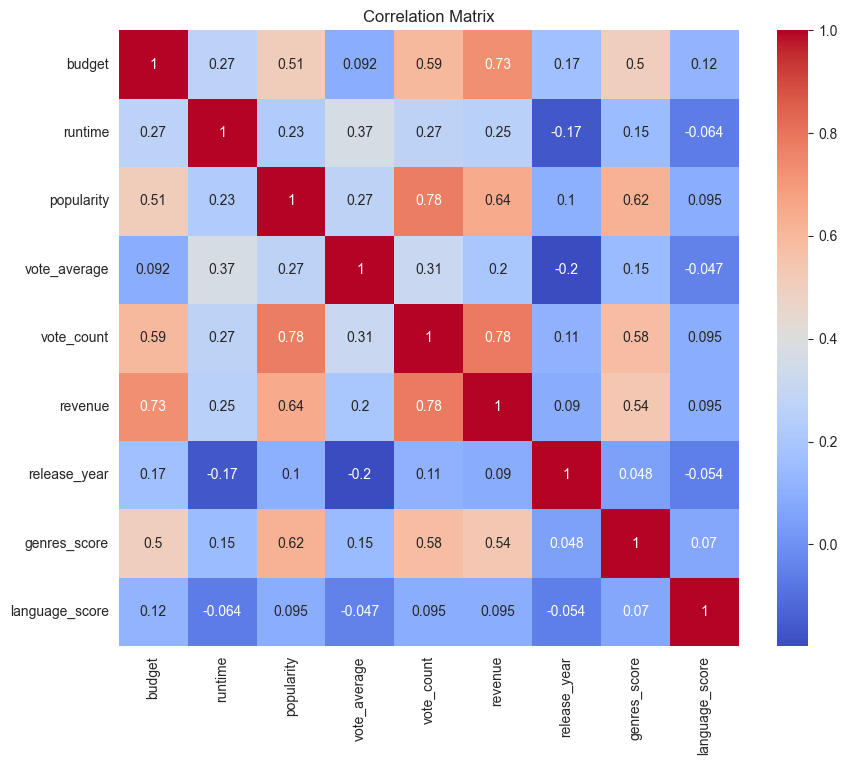

In [25]:
import seaborn as sns

corr_matrix = movies_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

Scatter plot with correlation of chosen variables

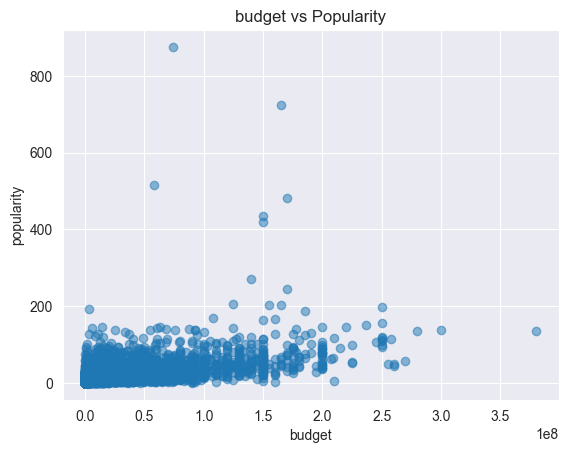

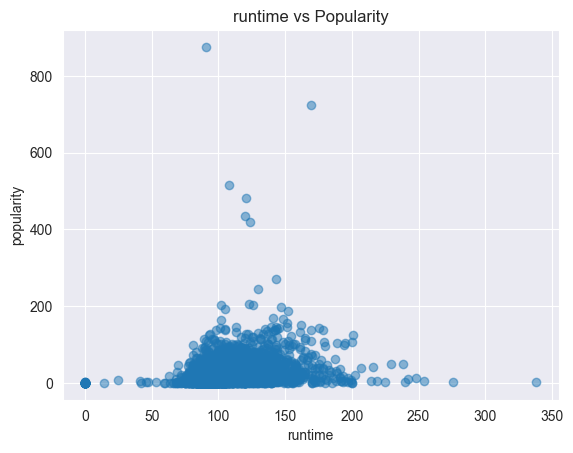

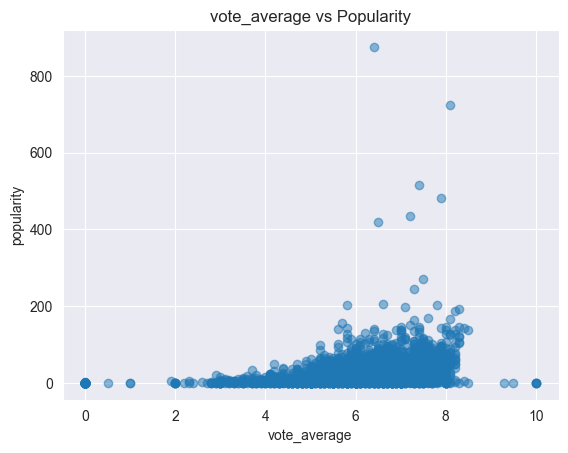

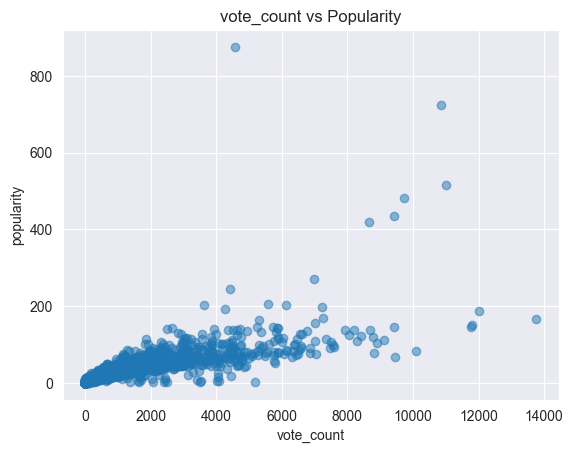

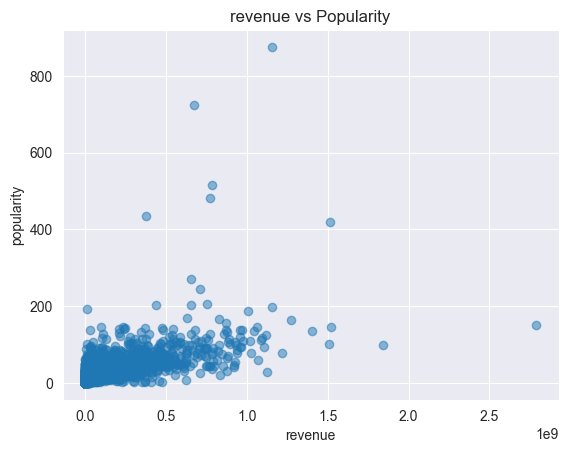

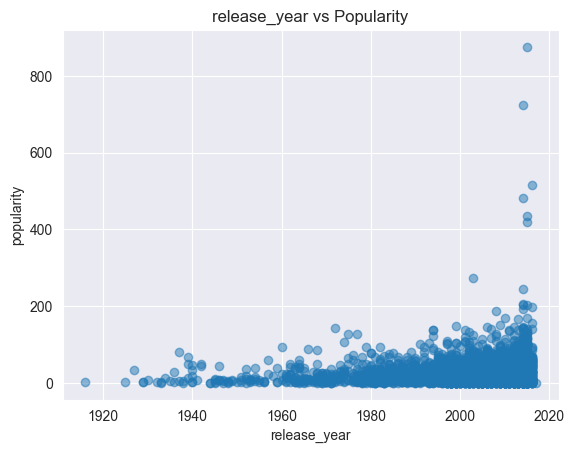

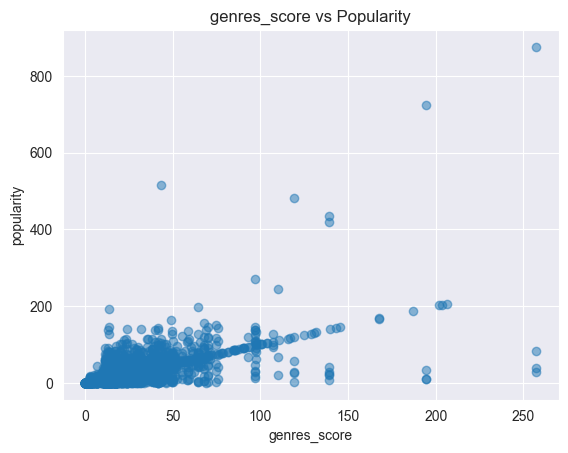

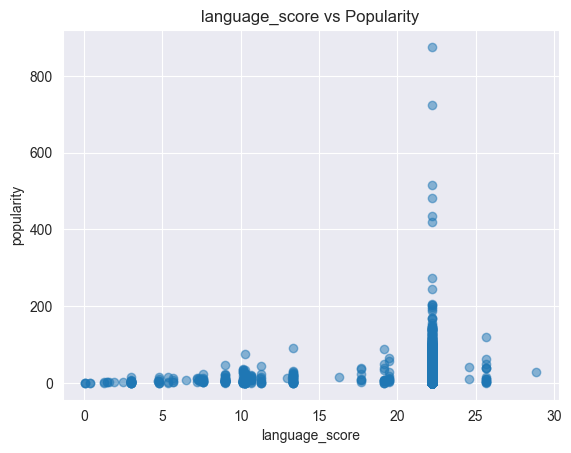

In [26]:
X = movies_df.drop(columns=['genres', 'original_language', 'popularity']).copy()
y = movies_df['popularity']

for col in X.columns:
    plt.figure()
    plt.scatter(X[col], y, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("popularity")
    plt.title(f"{col} vs Popularity")
    plt.grid(True)
    plt.show()


correction of chosen attributes

In [27]:
movies_df = movies_df.drop(columns=['language_score'])

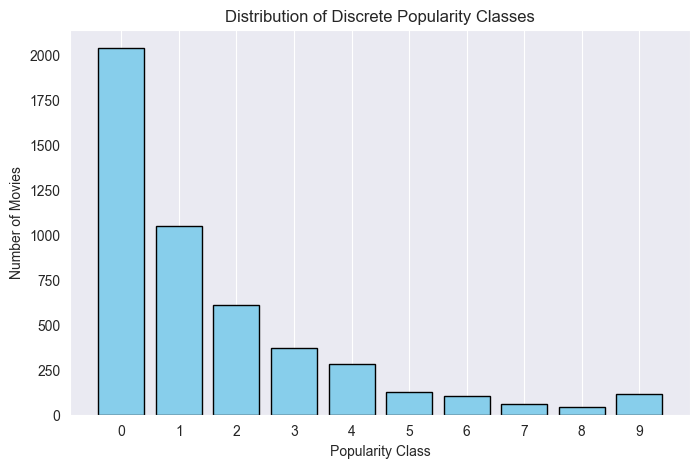

In [28]:
# prepering descreet data for classification


bins = [0, 10, 20,30, 40,50,60,70,80,90, movies_df['popularity'].max()]
labels = list(range(10))

movies_df['popularity_class'] = pd.cut(movies_df['popularity'], bins=bins, labels=labels, include_lowest=True)


class_counts = movies_df['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Discrete Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('histogram_popularity_discrete.png')
plt.show()  




movies_df.to_csv('cleaned_movies.csv', index=False)